In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("train.csv",)
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [3]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data.value_counts()

vidid      adview  views    likes  dislikes  comment  published   duration  category
VID_9999   38      1535490  1072   532       105      2016-07-21  PT10M1S   D           1
VID_171    4       28686    63     8         6        2013-07-25  PT4M14S   A           1
VID_17115  1       850886   1636   1054      76       2017-03-07  PT55M48S  E           1
VID_17114  2       2510835  4400   2793      201      2017-02-28  PT56M5S   E           1
VID_17113  1       4322021  5315   3438      306      2017-01-14  PT54M59S  E           1
                                                                                       ..
VID_2842   2       15106    9      6         0        2014-03-11  PT2M15S   C           1
VID_2841   1       13277    16     3         0        2014-02-10  PT22M30S  C           1
VID_2840   8       129524   91     39        2        2014-01-31  PT1M44S   C           1
VID_284    1       4473     20     4         0        2016-07-04  PT2M17S   A           1
VID_0      1   

In [5]:
data.shape

(14999, 9)

In [6]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data["category"] = data["category"].map(category)
data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
#Remove "f" present in the data
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']

In [8]:
data["views"] = pd.to_numeric(data["views"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"] = pd.to_numeric(data["adview"])
data["comment"] =pd.to_numeric(data["comment"])

In [9]:
col_vid=data['vidid']

In [10]:
# Encoding festures like category ,Duration , vidid
import sklearn
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])


In [11]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [12]:
#convert Time_in _sec for duration
import datetime
import time


In [13]:
def checklist(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    p = ['H', 'M', 'S']
    for i in y:
        if i not in p:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ''
            elif i == "M":
                m = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

Train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]

# Ensure 'checkli' handles unexpected or missing values
time = mp.apply(checklist)

def func_sec(time_string):
    if not time_string:
        return 0  # Return 0 for empty strings

    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)

data["duration"] = time1
data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9005,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


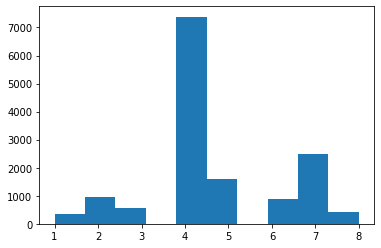

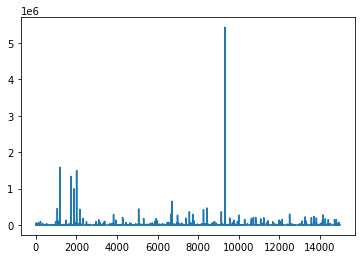

In [14]:
#visulization
   #individual plots
import matplotlib.pyplot as plt

plt.hist(data["category"])
plt.show()
plt.plot(data['adview'])
plt.show()


In [15]:
#Remove videos with adviews greaters
data= data[data["adview"]<2000000]
 

In [16]:
#Heat map
import seaborn as sns

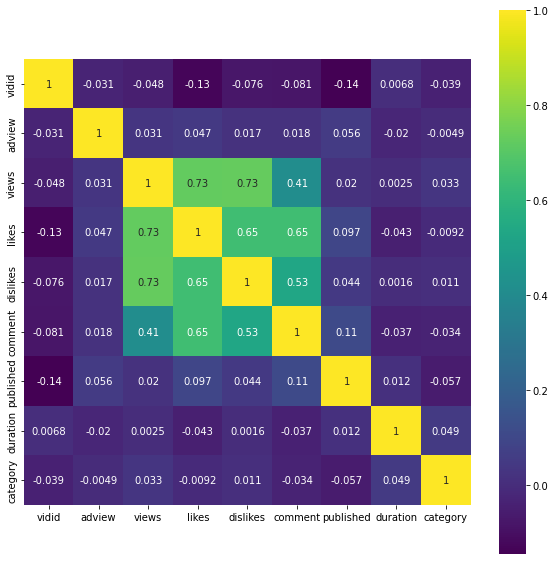

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()

# Change the colormap to 'viridis'
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='viridis', square=True, ax=ax, annot=True)

plt.show()


#split data

In [18]:
Y_train = pd.DataFrame(data.iloc[:,1].values, columns=['target'])
data = data.drop(["adview"],axis=1)
data = data.drop(["vidid"],axis=1)
data.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test=train_test_split(data , Y_train,test_size=0.2, random_state=42)

X_train.shape

(11708, 7)

#Normalise data

In [19]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)


#Evalustion Metrices

In [20]:
from sklearn import metrics
def print_error(X_test, y_test,model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))




#linear Regression

In [21]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train , y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


In [22]:
linear_regression.predict(X_test)

array([[-1047.53733041],
       [ 2733.77841851],
       [  387.67877451],
       ...,
       [ -938.21349345],
       [ 2937.76697295],
       [-1497.89294088]])

#Decision tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train ,y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2434.7718579234975
Mean Squared Error: 652593400.4515027
Root Mean Squared Error: 25545.90770459141


#Random Foresr Regressor


In [24]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth= 25
min_samples_split =15
min_samples_leaf =2
random_forest =RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth , min_samples_split=min_samples_split ,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)


d:\Anakonda\envs\My_learn\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 3333.0205278485914
Mean Squared Error: 645282393.5445933
Root Mean Squared Error: 25402.409207486467


#support vector Regressor

In [25]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,linear_regression)

d:\Anakonda\envs\My_learn\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


#Artificial Neural Network

In [26]:
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                               Dense(6,activation="relu",
                               input_shape=X_train.shape[1:]),
                               Dense(6,activation="relu"),
                               Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

history = ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 0s 942us/step - loss: 767407168.0000 - mean_squared_error: 767407168.0000
Epoch 2/100
366/366 [==============================] - 0s 802us/step - loss: 767403328.0000 - mean_squared_error: 767403328.0000
Epoch 3/100
366/366 [==============================] - 0s 710us/step - loss: 767392768.0000 - mean_squared_error: 767392768.0000
Epoch 4/100
366/366 [==============================] - 0s 683us/step - loss: 767371008.0000 - mean_squared_error: 767371008.0000
Epoch 5/100
366/366 [==============================] - 0s 683us/step - loss: 767335552.0000 - mean_squared_error: 767335552.0000
Epoch 6/100
366/366 [==============================] - 0s 678us/step - loss: 767284480.0000 - mean_squared_error: 767284480.0000
Epoch 7/100
366/366 [==============================] - 0s 788us/step - loss: 767220160.0000 - mean_squared_error: 767220160.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767143872.0000 - mean_

In [27]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [28]:
print_error(X_test , y_test ,ann)

Mean Absolute Error: 3224.9805787544433
Mean Squared Error: 829450706.5260566
Root Mean Squared Error: 28800.185876588654


In [29]:
#saving Scikit_learn models

import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")


['decisiontree_youtubeadview.pkl']

In [30]:
#saving keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [31]:
data_test = pd.read_csv("test.csv")

In [32]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [33]:
from tensorflow.keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [34]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [35]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [36]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [37]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [38]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train = pd.read_csv("test.csv")
mp= pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [39]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)


In [41]:
prediction = model.predict(X_test)

In [42]:
prediction=pd.DataFrame(prediction)
prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [43]:
prediction = prediction.rename(columns={0: "Adview"})

In [44]:
prediction.head()

,Adview
0,2164.390137
1,2325.071777
2,1286.110107
3,1114.347412
4,2071.679688


prediction of Data in Csv file

In [45]:
prediction.to_csv('predictions.csv')